# Import packages

In [177]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:24.095809. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# Load data

In [178]:
data_file_name = 'dataset.xlsx'
data_dir_path = '.'
data_file_path = os.path.join(data_dir_path, data_file_name)

# Load 'data' spreadsheet
df = pd.read_excel(open(data_file_path, 'rb'), sheetname='data', header=1)

# print(df.head())
# print(df.columns)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:24.107250. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# 1) Preprocessing - fill in missing values

# Defin a function

In [179]:
def fill_in_missing_data(data, window_size):
    num_of_data = len(data)
    indices = np.where(np.isnan(data))[0]

    for i in indices:
        values = []
        distances = []
        for j in range(1,window_size+1):
            if i-j >= 0 and not np.isnan(data[i-j]):
                values.append(data[i-j])
                distances.append(j)
            if i+j < num_of_data and not np.isnan(data[i+j]):
                values.append(data[i+j])
                distances.append(j)

        values = np.array(values)
        distances = np.array(distances)
        inverse_distances = 1.0 / distances
        weights = inverse_distances / np.sum(inverse_distances)
        filling_value = np.sum(np.multiply(values, weights))
        data[i] = filling_value
    return data

def test_fill_in_missing_data(data, window_size):
    modified_data = fill_in_missing_data(np.copy(data), 3)
    plt.plot(modified_data)
    plt.show()
#     data[np.where(np.isnan(data))] = 0
#     plt.plot(data)
#     plt.ylim(1800, 2100)
#     plt.show()
    

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:24.411653. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# Fill in missing values - Kospi & Kosdaq

In [180]:
kospi = df['KOSPI']
kosdaq = df['KOSDAQ']

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:24.461445. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


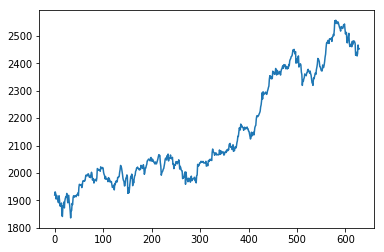

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:24.474954. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [181]:
test_fill_in_missing_data(np.copy(kospi),3)

In [182]:
# fill in missing values
window_size = 3
df['KOSPI'] = fill_in_missing_data(np.copy(kospi), window_size)
df['KOSDAQ'] = fill_in_missing_data(np.copy(kosdaq), window_size)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:24.811091. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# 2) Preprocessing - add 'season' feature based on 'date'

In [183]:
season_as_num = df['Date'].apply(lambda dt: (dt.month%12 + 3)//3)
df['Season'] = np.where(season_as_num == 1, 'winter', 
                            (np.where(season_as_num == 2, 'spring',
                                     np.where(season_as_num == 3, 'summer', 'fall'))))

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:24.842295. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# 3) Preprocessing - add 'Average_Temperature_Normalized'

In [184]:
df['Average_Temperature_Normalized'] = np.zeros_like(df['Average_Temperature'])

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:24.869503. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [185]:
month = 0
season = None
indices = []
avg_temperatures = []
for i, date in enumerate(df['Date']):
    if month == 0:
        month = date.month
        season = df['Season'][i]
    indices.append(i)
    avg_temperatures.append(df['Average_Temperature'][i])
    if i == len(df['Date'])-1:
        mean_avg_temperature = np.mean(avg_temperatures)
        sd_avg_temperature = np.std(avg_temperatures)
        if season == 'spring' or season == 'summer':
            df['Average_Temperature_Normalized'][indices] = (mean_avg_temperature - df['Average_Temperature'][indices]) / sd_avg_temperature
        else:
            df['Average_Temperature_Normalized'][indices] = (df['Average_Temperature'][indices] - mean_avg_temperature) / sd_avg_temperature
    elif month != date.month:
        mean_avg_temperature = np.mean(avg_temperatures[:-1])
        sd_avg_temperature = np.std(avg_temperatures[:-1])
        if season == 'spring' or season == 'summer':
            df['Average_Temperature_Normalized'][indices] = (mean_avg_temperature - df['Average_Temperature'][indices]) / sd_avg_temperature
        else:
            df['Average_Temperature_Normalized'][indices] = (df['Average_Temperature'][indices] - mean_avg_temperature) / sd_avg_temperature
        month = date.month
        indices = [i]
        avg_temperatures = [df['Average_Temperature'][i]]
    

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:24.881286. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


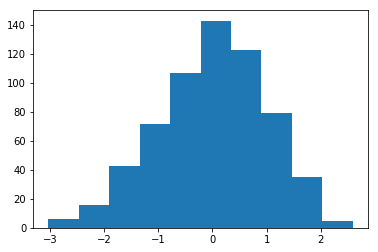

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:28.232665. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [186]:
plt.hist(df['Average_Temperature_Normalized'])
plt.show()

# 4) Preprocessing - classify 'Revenue' for classification

# Add 'Revenue_Normalized' variable to see how 'Revenue' has changed

In [187]:
df['Revenue_Normalized'] = np.zeros_like(df['Revenue'])

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:28.492065. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [188]:
month = 0
indices = []
revenues = []
for i, date in enumerate(df['Date']):
    if month == 0:
        month = date.month
    indices.append(i)
    revenues.append(df['Revenue'][i])
    if i == len(df['Date'])-1:
        mean_revenue = np.mean(revenues)
        sd_revenue = np.std(revenues)
        df['Revenue_Normalized'][indices] = (df['Revenue'][indices] - mean_revenue) / sd_revenue
    elif month != date.month:
        mean_revenue = np.mean(revenues[:-1])
        sd_revenue = np.std(revenues[:-1])
        df['Revenue_Normalized'][indices] = (df['Revenue'][indices] - mean_revenue) / sd_revenue
        month = date.month
        indices = [i]
        revenues = [df['Revenue'][i]]
    

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:28.504556. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


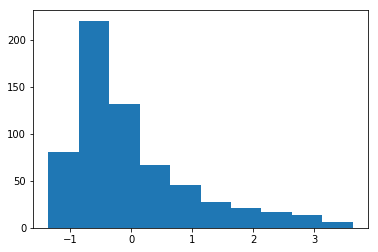

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:32.044478. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [189]:
plt.hist(df['Revenue_Normalized'])
plt.show()

# Classify 'Revenue'

In [190]:
rate = df['Revenue_Normalized']
df['Rate_Class'] = np.where(rate > 0.7, 'very high', 
                            (np.where(rate > 0.3, 'high',
                                     np.where(rate > -0.3, 'moderate',
                                             np.where(rate > -0.7, 'low', 'very low')))))

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:32.435475. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


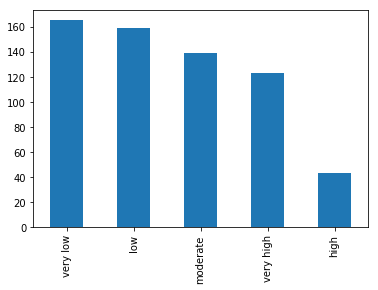

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:32.457525. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [191]:
# Show the distribution of 'Rate Class'
df['Rate_Class'].value_counts().plot(kind='bar')
plt.show()

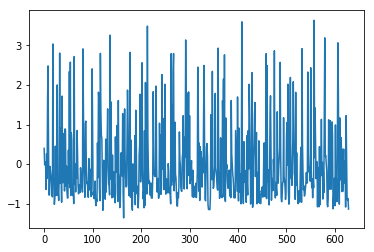

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:32.778160. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [192]:
plt.plot(rate.tolist())
plt.show()

# 5) Preprocessing - Normalization

# Define a function

In [193]:
def normalize(data):
    ''' Min Max Normalization
    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]
    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]
    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html
    '''
    numerator = data - np.mean(data)
    denominator = np.std(data)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:33.058994. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# All Variables except 'Date', 'Rate_Class', 'Season' and normalized variables

In [194]:
df.columns

Index([u'Date', u'KOSPI', u'KOSDAQ', u'Average_Temperature', u'Lowest_Temperature', u'Highest_temperature', u'Precipitation', u'Average_Wind_Speed', u'Average_Relative_humidity', u'Daylight_Hours', u'Cloud_Cover', u'Duration_of_Fog', u'Revenue', u'Fitness', u'Sports_Center', u'Gym', u'Diet', u'Body', u'Busan_Sports_Center', u'Busan_Gym', u'Season', u'Average_Temperature_Normalized', u'Revenue_Normalized', u'Rate_Class'], dtype='object')

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:33.075741. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [195]:
columns = [x for x in df.columns if x not in ['Date', 'Rate_Class', 'Season', 'Average_Temperature_Normalized', 'Revenue_Normalized']]
print(columns)
df_scaled = df.copy()
df_scaled[columns] = df_scaled[columns].apply(normalize, axis=0)
df_scaled['Date'] = df['Date']
df_scaled['Rate_Class'] = df['Rate_Class']

[u'KOSPI', u'KOSDAQ', u'Average_Temperature', u'Lowest_Temperature', u'Highest_temperature', u'Precipitation', u'Average_Wind_Speed', u'Average_Relative_humidity', u'Daylight_Hours', u'Cloud_Cover', u'Duration_of_Fog', u'Revenue', u'Fitness', u'Sports_Center', u'Gym', u'Diet', u'Body', u'Busan_Sports_Center', u'Busan_Gym']


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:33.095075. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# Final dataset - Done with preprocessing

In [196]:
# Debugging
df_scaled.fillna(0, inplace=True)
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df_scaled.isnull().values.any()
nan_rows = df_scaled[df_scaled.isnull().T.any().T]
nan_rows

height has been deprecated.



,Date,KOSPI,KOSDAQ,Average_Temperature,Lowest_Temperature,Highest_temperature,Precipitation,Average_Wind_Speed,Average_Relative_humidity,Daylight_Hours,Cloud_Cover,Duration_of_Fog,Revenue,Fitness,Sports_Center,Gym,Diet,Body,Busan_Sports_Center,Busan_Gym,Season,Average_Temperature_Normalized,Revenue_Normalized,Rate_Class


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:33.134065. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [197]:
df_scaled.head()

,Date,KOSPI,KOSDAQ,Average_Temperature,Lowest_Temperature,Highest_temperature,Precipitation,Average_Wind_Speed,Average_Relative_humidity,Daylight_Hours,Cloud_Cover,Duration_of_Fog,Revenue,Fitness,Sports_Center,Gym,Diet,Body,Busan_Sports_Center,Busan_Gym,Season,Average_Temperature_Normalized,Revenue_Normalized,Rate_Class
0,2016-01-04,-1.151953,0.287214,-0.608890,-0.506602,-0.574746,-0.285686,-0.016943,0.342568,-0.836233,-1.467212,-0.122031,0.483480,0.734342,0.903352,3.990658,2.044022,1.343423,2.862245,4.261320,winter,2.591066,0.399221,high
1,2016-01-05,-1.092558,0.436134,-1.216455,-0.994161,-1.469336,-0.267387,0.016230,0.183380,-1.126611,0.202475,-0.122031,0.097475,0.660965,0.360811,2.008003,1.305837,0.905758,-0.567634,2.863554,winter,0.857798,-0.017328,moderate
2,2016-01-06,-1.118294,0.512017,-1.276020,-1.149293,-1.242539,-0.285686,-0.000357,-0.005287,-0.866621,-0.174551,-0.122031,0.161809,1.553687,-0.026693,1.459698,1.545523,0.853020,-0.274840,2.475287,winter,0.687870,0.052096,moderate
3,2016-01-07,-1.224771,0.331558,-1.383237,-1.226859,-1.418937,-0.285686,-0.016943,0.372047,-0.836233,-1.440282,-0.122031,0.071741,0.587588,0.070194,0.846762,1.643549,1.723091,-0.442151,2.785901,winter,0.381999,-0.045098,moderate
4,2016-01-08,-1.157706,0.400327,-1.550020,-1.404153,-1.620535,-0.285686,-0.000357,0.277713,-0.819350,-1.467212,-0.122031,-0.481532,-0.268431,-0.220422,0.083722,1.214685,1.021763,-0.818601,0.689253,winter,-0.093800,-0.642152,low


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:33.170835. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# Save the data in excel format

In [198]:
import openpyxl

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:33.233989. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [199]:
df_scaled.to_excel('df_scaled.xlsx', sheet_name='sheet1', index=False)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:33.250075. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# Regression Models

# Create dataset

In [200]:
# define a function to create dataset
def create_dateset(variables, seq_len):
    dataX = []
    dataY = []
    for i in range(df_scaled.shape[0] - seq_len):
        _x = df_scaled.loc[i:i+seq_len-1, variables].values
        _y = [df_scaled.loc[i+seq_len, 'Revenue_Normalized']]
        dataX.append(_x)
        dataY.append(_y)
    return dataX, dataY

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:33.917778. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# Create train, validation and test set

In [201]:
def split_dataset(dataX, dataY, train_data_rate, val_data_rate, model):
    train_size = int(len(dataY)*train_data_rate)
    val_size = int(len(dataY)*val_data_rate)
    test_size = len(dataY) - train_size - val_size

    if model=='linear':
        trainX, valX, testX = np.array(dataX[:train_size]).reshape((train_size, -1)),\
                                       np.array(dataX[train_size:train_size+val_size]).reshape((val_size, -1)),\
                                       np.array(dataX[train_size+val_size:len(dataX)]).reshape((test_size, -1))
        trainY, valY, testY = np.array(dataY[:train_size]).reshape((train_size, -1)),\
                                       np.array(dataY[train_size:train_size+val_size]).reshape((val_size, -1)),\
                                       np.array(dataY[train_size+val_size:len(dataY)]).reshape((test_size, -1))
    elif model=='lstm':
        trainX, valX, testX = np.array(dataX[:train_size]), np.array(dataX[train_size:train_size+val_size]), np.array(dataX[train_size+val_size:len(dataX)])
        trainY, valY, testY = np.array(dataY[:train_size]), np.array(dataY[train_size:train_size+val_size]), np.array(dataY[train_size+val_size:len(dataY)])
    return (trainX, valX, testX, trainY, valY, testY)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:33.935056. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# Error calculator

In [202]:
def calculate_error(trained_model, X, Y):
    def _rmse(target, pred):
        error = np.sqrt(np.mean(np.square(target - pred)))
        return error
    pred = trained_model.predict(X)
    rmse_error = _rmse(Y, pred)
    return rmse_error

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:33.964109. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# Validate seq_len

In [203]:
def validate_seq_len(seq_len_list, train_data_rate, val_data_rate, model):
    val_rmse_errors = []
    for seq_len in seq_len_list:
        dataX, dataY = create_dateset(regression_variables, seq_len)
        (lm_trainX, lm_valX, lm_testX, lm_trainY, lm_valY, lm_testY) = \
        split_dataset(dataX, dataY, train_data_rate, val_data_rate, model)
        lm = linear_model(lm_trainX, lm_trainY)
        val_rmse_error = calculate_error(lm, lm_valX, lm_valY)
        val_rmse_errors.append(val_rmse_error)
    plt.plot(seq_len_list, val_rmse_errors)
    plt.show()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:33.980542. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# Define variables to use

In [204]:
# Hyperparameters for Linear model. Tune these variables.
regression_variables = df_scaled.columns.tolist()
variables_to_remove = ['Date', 'Rate_Class', 'Revenue', 'Season', 'Average_Temperature', 'Lowest_Temperature', 'Highest_temperature']

for variable in variables_to_remove:
    regression_variables.remove(variable)
print(regression_variables)

[u'KOSPI', u'KOSDAQ', u'Precipitation', u'Average_Wind_Speed', u'Average_Relative_humidity', u'Daylight_Hours', u'Cloud_Cover', u'Duration_of_Fog', u'Fitness', u'Sports_Center', u'Gym', u'Diet', u'Body', u'Busan_Sports_Center', u'Busan_Gym', 'Average_Temperature_Normalized', 'Revenue_Normalized']


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:33.999736. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# 1) Linear Model

# Import additional packages 

In [205]:
from sklearn.linear_model import LinearRegression

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:34.033242. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# Define a function to create and train linear model

In [206]:
def linear_model(lm_trainX, lm_trainY, fit_intercept=True, normalize=False, copy_X=True):
    lm = LinearRegression(fit_intercept=fit_intercept, normalize=normalize, copy_X=copy_X)
    lm.fit(lm_trainX, lm_trainY)
    return lm

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:34.058178. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


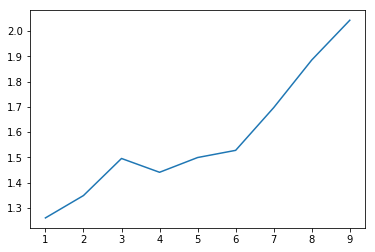

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:34.077828. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [207]:
validate_seq_len(seq_len_list=[1,2,3,4,5,6,7,8,9], train_data_rate=0.6, val_data_rate=0.25, model='linear')

# Assign hyperparameters

In [208]:
seq_len = 4

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:45.700846. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# Create and split dataset

In [209]:
dataX, dataY = create_dateset(regression_variables, seq_len=seq_len)
(lm_trainX, lm_valX, lm_testX, lm_trainY, lm_valY, lm_testY) = \
        split_dataset(dataX, dataY, 0.6, 0.25, 'linear')

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:45.714244. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# Train linear model

In [210]:
lm = linear_model(lm_trainX, lm_trainY, fit_intercept=True, normalize=False, copy_X=True)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:46.832618. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# Evaluation

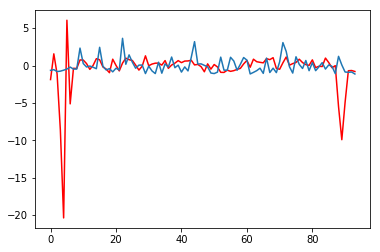

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:46.847587. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [211]:
test_pred = lm.predict(lm_testX)
plt.plot(test_pred, color='red')
plt.plot(lm_testY)
plt.show()

In [212]:
test_error = calculate_error(lm, lm_testX, lm_testY)
print(test_error)

2.8825318345691713


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:47.144181. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# 2) LSTM 

# Import additional packages 

In [213]:
import tensorflow as tf

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:47.158330. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# Assign hyperparameters 

In [214]:
# Hyperparameters for LSTM model. Tune these variables.
# Fixed hyperparameters
data_dim = len(regression_variables)
output_dim = 1

seq_len = 5
hidden_dim = 10
iterations = 2000

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:47.167670. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# Create dataset for lstm model

In [215]:
dataX, dataY = create_dateset(seq_len=seq_len, variables=regression_variables)
(lstm_trainX, lstm_valX, lstm_testX, lstm_trainY, lstm_valY, lstm_testY) = split_dataset(dataX, dataY, 0.6, 0.25, 'lstm')

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:42:47.179013. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# Create and train LSTM model

In [220]:
def create_lstm_model(seq_len, data_dim, output_dim, hidden_dim):
    tf.reset_default_graph()

    X = tf.placeholder(tf.float32, [None, seq_len, data_dim])
    Y = tf.placeholder(tf.float32, [None, output_dim])

    cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True)
    outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype = tf.float32)
    
    Y_pred = tf.contrib.layers.fully_connected(outputs[:, -1], output_dim, activation_fn=None)
    loss = tf.reduce_sum(tf.square(Y_pred - Y))
    optimizer = tf.train.AdamOptimizer(0.02)
    train = optimizer.minimize(loss)
    
    predictions = tf.placeholder(tf.float32, [None, 1])
    targets = tf.placeholder(tf.float32, [None, 1])
    rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))
    return (X, Y, Y_pred, train, loss, targets, predictions, rmse)
    
def train_lstm_model(lstm_trainX, lstm_trainY, lstm_valX, lstm_valY, seq_len, data_dim, output_dim, hidden_dim, iterations):
    X, Y, Y_pred, train, loss, targets, predictions, rmse = create_lstm_model(seq_len, data_dim, output_dim, hidden_dim)
    with tf.Session() as sess :
        init = tf.global_variables_initializer()
        sess.run(init)
    
        for i in range(iterations) :
            _, _ = sess.run([train, loss], feed_dict = {X:lstm_trainX, Y:lstm_trainY})
            if i % 100 == 0:
                step_loss = sess.run(loss, feed_dict = {X:lstm_valX, Y:lstm_valY}) 
            print("Step {} - loss : {}".format(i, step_loss))
        return sess, X, Y, Y_pred, train, loss, targets, predictions, rmse

def validate_error(sess, X, Y, Y_pred, targets, predictions, lstm_valX, lstm_valY):
    val_predict = sess.run(Y_pred, feed_dict = {X:lstm_valX})
    val_rmse_error = sess.run(rmse, feed_dict = {Y: lstm_valY, predictions : val_predict})
    print("VALIDATION RMSE ERROR : {}".format(val_rmse_error))
    test_predict = sess.run(Y_pred, feed_dict = {X:testX})
    test_rmse_error = sess.run(rmse, feed_dict = {targets : testY, predictions:test_predict})
    print("TEST RMSE ERROR : {}".format(test_rmse_error))
    
    plt.plot(valY)
    plt.plot(val_predict)
    plt.xlabel("Time Period")
    plt.show()
    plt.plot(testY)
    plt.plot(test_predict)
    plt.xlabel("Time Period")
    plt.show()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:45:16.187675. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [221]:
results = train_lstm_model(lstm_trainX, lstm_trainY, lstm_valX, lstm_valY, seq_len, data_dim, output_dim, hidden_dim, iterations)

Step 0 - loss : 163.152191162
Step 1 - loss : 163.152191162
Step 2 - loss : 163.152191162
Step 3 - loss : 163.152191162
Step 4 - loss : 163.152191162
Step 5 - loss : 163.152191162
Step 6 - loss : 163.152191162
Step 7 - loss : 163.152191162
Step 8 - loss : 163.152191162
Step 9 - loss : 163.152191162
Step 10 - loss : 163.152191162
Step 11 - loss : 163.152191162
Step 12 - loss : 163.152191162
Step 13 - loss : 163.152191162
Step 14 - loss : 163.152191162
Step 15 - loss : 163.152191162
Step 16 - loss : 163.152191162
Step 17 - loss : 163.152191162
Step 18 - loss : 163.152191162
Step 19 - loss : 163.152191162
Step 20 - loss : 163.152191162
Step 21 - loss : 163.152191162
Step 22 - loss : 163.152191162
Step 23 - loss : 163.152191162
Step 24 - loss : 163.152191162
Step 25 - loss : 163.152191162
Step 26 - loss : 163.152191162
Step 27 - loss : 163.152191162
Step 28 - loss : 163.152191162
Step 29 - loss : 163.152191162
Step 30 - loss : 163.152191162
Step 31 - loss : 163.152191162
Step 32 - loss : 1

Step 276 - loss : 247.675018311
Step 277 - loss : 247.675018311
Step 278 - loss : 247.675018311
Step 279 - loss : 247.675018311
Step 280 - loss : 247.675018311
Step 281 - loss : 247.675018311
Step 282 - loss : 247.675018311
Step 283 - loss : 247.675018311
Step 284 - loss : 247.675018311
Step 285 - loss : 247.675018311
Step 286 - loss : 247.675018311
Step 287 - loss : 247.675018311
Step 288 - loss : 247.675018311
Step 289 - loss : 247.675018311
Step 290 - loss : 247.675018311
Step 291 - loss : 247.675018311
Step 292 - loss : 247.675018311
Step 293 - loss : 247.675018311
Step 294 - loss : 247.675018311
Step 295 - loss : 247.675018311
Step 296 - loss : 247.675018311
Step 297 - loss : 247.675018311
Step 298 - loss : 247.675018311
Step 299 - loss : 247.675018311
Step 300 - loss : 246.454071045
Step 301 - loss : 246.454071045
Step 302 - loss : 246.454071045
Step 303 - loss : 246.454071045
Step 304 - loss : 246.454071045
Step 305 - loss : 246.454071045
Step 306 - loss : 246.454071045
Step 307

Step 539 - loss : 244.632614136
Step 540 - loss : 244.632614136
Step 541 - loss : 244.632614136
Step 542 - loss : 244.632614136
Step 543 - loss : 244.632614136
Step 544 - loss : 244.632614136
Step 545 - loss : 244.632614136
Step 546 - loss : 244.632614136
Step 547 - loss : 244.632614136
Step 548 - loss : 244.632614136
Step 549 - loss : 244.632614136
Step 550 - loss : 244.632614136
Step 551 - loss : 244.632614136
Step 552 - loss : 244.632614136
Step 553 - loss : 244.632614136
Step 554 - loss : 244.632614136
Step 555 - loss : 244.632614136
Step 556 - loss : 244.632614136
Step 557 - loss : 244.632614136
Step 558 - loss : 244.632614136
Step 559 - loss : 244.632614136
Step 560 - loss : 244.632614136
Step 561 - loss : 244.632614136
Step 562 - loss : 244.632614136
Step 563 - loss : 244.632614136
Step 564 - loss : 244.632614136
Step 565 - loss : 244.632614136
Step 566 - loss : 244.632614136
Step 567 - loss : 244.632614136
Step 568 - loss : 244.632614136
Step 569 - loss : 244.632614136
Step 570

Step 813 - loss : 242.784423828
Step 814 - loss : 242.784423828
Step 815 - loss : 242.784423828
Step 816 - loss : 242.784423828
Step 817 - loss : 242.784423828
Step 818 - loss : 242.784423828
Step 819 - loss : 242.784423828
Step 820 - loss : 242.784423828
Step 821 - loss : 242.784423828
Step 822 - loss : 242.784423828
Step 823 - loss : 242.784423828
Step 824 - loss : 242.784423828
Step 825 - loss : 242.784423828
Step 826 - loss : 242.784423828
Step 827 - loss : 242.784423828
Step 828 - loss : 242.784423828
Step 829 - loss : 242.784423828
Step 830 - loss : 242.784423828
Step 831 - loss : 242.784423828
Step 832 - loss : 242.784423828
Step 833 - loss : 242.784423828
Step 834 - loss : 242.784423828
Step 835 - loss : 242.784423828
Step 836 - loss : 242.784423828
Step 837 - loss : 242.784423828
Step 838 - loss : 242.784423828
Step 839 - loss : 242.784423828
Step 840 - loss : 242.784423828
Step 841 - loss : 242.784423828
Step 842 - loss : 242.784423828
Step 843 - loss : 242.784423828
Step 844

Step 1076 - loss : 240.575241089
Step 1077 - loss : 240.575241089
Step 1078 - loss : 240.575241089
Step 1079 - loss : 240.575241089
Step 1080 - loss : 240.575241089
Step 1081 - loss : 240.575241089
Step 1082 - loss : 240.575241089
Step 1083 - loss : 240.575241089
Step 1084 - loss : 240.575241089
Step 1085 - loss : 240.575241089
Step 1086 - loss : 240.575241089
Step 1087 - loss : 240.575241089
Step 1088 - loss : 240.575241089
Step 1089 - loss : 240.575241089
Step 1090 - loss : 240.575241089
Step 1091 - loss : 240.575241089
Step 1092 - loss : 240.575241089
Step 1093 - loss : 240.575241089
Step 1094 - loss : 240.575241089
Step 1095 - loss : 240.575241089
Step 1096 - loss : 240.575241089
Step 1097 - loss : 240.575241089
Step 1098 - loss : 240.575241089
Step 1099 - loss : 240.575241089
Step 1100 - loss : 240.486541748
Step 1101 - loss : 240.486541748
Step 1102 - loss : 240.486541748
Step 1103 - loss : 240.486541748
Step 1104 - loss : 240.486541748
Step 1105 - loss : 240.486541748
Step 1106 

Step 1328 - loss : 239.308288574
Step 1329 - loss : 239.308288574
Step 1330 - loss : 239.308288574
Step 1331 - loss : 239.308288574
Step 1332 - loss : 239.308288574
Step 1333 - loss : 239.308288574
Step 1334 - loss : 239.308288574
Step 1335 - loss : 239.308288574
Step 1336 - loss : 239.308288574
Step 1337 - loss : 239.308288574
Step 1338 - loss : 239.308288574
Step 1339 - loss : 239.308288574
Step 1340 - loss : 239.308288574
Step 1341 - loss : 239.308288574
Step 1342 - loss : 239.308288574
Step 1343 - loss : 239.308288574
Step 1344 - loss : 239.308288574
Step 1345 - loss : 239.308288574
Step 1346 - loss : 239.308288574
Step 1347 - loss : 239.308288574
Step 1348 - loss : 239.308288574
Step 1349 - loss : 239.308288574
Step 1350 - loss : 239.308288574
Step 1351 - loss : 239.308288574
Step 1352 - loss : 239.308288574
Step 1353 - loss : 239.308288574
Step 1354 - loss : 239.308288574
Step 1355 - loss : 239.308288574
Step 1356 - loss : 239.308288574
Step 1357 - loss : 239.308288574
Step 1358 

Step 1599 - loss : 236.772399902
Step 1600 - loss : 236.215576172
Step 1601 - loss : 236.215576172
Step 1602 - loss : 236.215576172
Step 1603 - loss : 236.215576172
Step 1604 - loss : 236.215576172
Step 1605 - loss : 236.215576172
Step 1606 - loss : 236.215576172
Step 1607 - loss : 236.215576172
Step 1608 - loss : 236.215576172
Step 1609 - loss : 236.215576172
Step 1610 - loss : 236.215576172
Step 1611 - loss : 236.215576172
Step 1612 - loss : 236.215576172
Step 1613 - loss : 236.215576172
Step 1614 - loss : 236.215576172
Step 1615 - loss : 236.215576172
Step 1616 - loss : 236.215576172
Step 1617 - loss : 236.215576172
Step 1618 - loss : 236.215576172
Step 1619 - loss : 236.215576172
Step 1620 - loss : 236.215576172
Step 1621 - loss : 236.215576172
Step 1622 - loss : 236.215576172
Step 1623 - loss : 236.215576172
Step 1624 - loss : 236.215576172
Step 1625 - loss : 236.215576172
Step 1626 - loss : 236.215576172
Step 1627 - loss : 236.215576172
Step 1628 - loss : 236.215576172
Step 1629 

Step 1850 - loss : 234.425186157
Step 1851 - loss : 234.425186157
Step 1852 - loss : 234.425186157
Step 1853 - loss : 234.425186157
Step 1854 - loss : 234.425186157
Step 1855 - loss : 234.425186157
Step 1856 - loss : 234.425186157
Step 1857 - loss : 234.425186157
Step 1858 - loss : 234.425186157
Step 1859 - loss : 234.425186157
Step 1860 - loss : 234.425186157
Step 1861 - loss : 234.425186157
Step 1862 - loss : 234.425186157
Step 1863 - loss : 234.425186157
Step 1864 - loss : 234.425186157
Step 1865 - loss : 234.425186157
Step 1866 - loss : 234.425186157
Step 1867 - loss : 234.425186157
Step 1868 - loss : 234.425186157
Step 1869 - loss : 234.425186157
Step 1870 - loss : 234.425186157
Step 1871 - loss : 234.425186157
Step 1872 - loss : 234.425186157
Step 1873 - loss : 234.425186157
Step 1874 - loss : 234.425186157
Step 1875 - loss : 234.425186157
Step 1876 - loss : 234.425186157
Step 1877 - loss : 234.425186157
Step 1878 - loss : 234.425186157
Step 1879 - loss : 234.425186157
Step 1880 

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-24 02:45:18.156676. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# Classification Models

# 1) Decision Tree

# Import additional packages 

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-04 17:29:48.467546. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# Determin which features are used

In [79]:
# Refer to the list of columns of df_scaled to decide which features you want to use for lstm model
print(df_scaled.columns.tolist())
dt_variables = ['Average_Temperature_Normalized', 'Revenue_Normalized']

[u'Date', u'KOSPI', u'KOSDAQ', u'Average_Temperature', u'Lowest_Temperature', u'Highest_temperature', u'Precipitation', u'Average_Wind_Speed', u'Average_Relative_humidity', u'Daylight_Hours', u'Cloud_Cover', u'Duration_of_Fog', u'Revenue', u'Fitness', u'Sports_Center', u'Gym', u'Diet', u'Body', u'Busan_Sports_Center', u'Busan_Gym', 'Season', 'Average_Temperature_Normalized', 'Revenue_Normalized', 'Rate_Class']


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-04 17:29:49.961224. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# Assign hyperparameters 

In [37]:
# Hyperparameters for Decision Tree model. Tune these variables.


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-04 16:47:19.176747. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# Create dataset

In [82]:
dataX = []
dataY = []
for i in range(df_scaled.shape[0] - seq_len):
    _x = df_scaled.loc[i:i+seq_len-1, dt_variables].values
    _y = df_scaled.loc[i+seq_len, ['Rate_Class']].values
    dataX.append(_x)
    dataY.append(_y)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-04 17:32:18.217021. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# Create train, validation and test set

In [83]:
train_size = int(len(dataY)*0.6)
val_size = int(len(dataY)*0.25)
test_size = len(dataY) - train_size - val_size

dt_trainX, dt_valX, dt_testX = np.array(dataX[:train_size]).reshape((train_size, -1)),\
                               np.array(dataX[train_size:train_size+val_size]).reshape((val_size, -1)),\
                               np.array(dataX[train_size+val_size:len(dataX)]).reshape((test_size, -1))
dt_trainY, dt_valY, dt_testY = np.array(dataY[:train_size]).reshape((train_size, -1)),\
                               np.array(dataY[train_size:train_size+val_size]).reshape((val_size, -1)),\
                               np.array(dataY[train_size+val_size:len(dataY)]).reshape((test_size, -1))

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-04 17:32:23.108049. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [84]:
print(dt_trainX)
print(dt_trainY)

[[ 2.59106621  0.39922085  0.85779789 ... -0.0450984  -0.0938004
  -0.6421524 ]
 [ 0.85779789 -0.01732845  0.68786962 ... -0.6421524   0.34801309
   0.26037108]
 [ 0.68786962  0.05209643  0.38199874 ...  0.26037108  0.58591266
  -0.36445287]
 ...
 [-0.70589988 -0.82116613 -2.4913141  ... -0.94419169 -0.03636955
   1.16546896]
 [-2.4913141   2.76176366 -2.58058482 ...  1.16546896  0.7224315
  -0.10275757]
 [-2.58058482 -0.88343833 -0.79517059 ... -0.10275757  0.99024363
  -0.01618402]]
[['moderate']
 ['low']
 ['very high']
 ['very high']
 ['high']
 ['very low']
 ['very low']
 ['moderate']
 ['moderate']
 ['moderate']
 ['low']
 ['very low']
 ['very low']
 ['very high']
 ['low']
 ['low']
 ['very low']
 ['very low']
 ['high']
 ['very low']
 ['low']
 ['very low']
 ['very high']
 ['very low']
 ['very low']
 ['very low']
 ['moderate']
 ['very high']
 ['low']
 ['very high']
 ['moderate']
 ['very low']
 ['very high']
 ['moderate']
 ['low']
 ['moderate']
 ['very high']
 ['low']
 ['very high']
 ['

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-04 17:32:25.842097. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# Create and train Decision Tree model

In [85]:
dt = DecisionTreeClassifier()
dt.fit(dt_trainX, dt_trainY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-04 17:33:12.578113. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [89]:
pred_valY = dt.predict(dt_valX)
true_valY = dt_valY.reshape((-1))

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-04 17:34:26.298152. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [90]:
confusion_matrix(true_valY, pred_valY)

array([[ 0,  1,  1,  5,  6],
       [ 5, 10,  6,  6, 13],
       [ 5,  7,  6,  4,  8],
       [ 2,  8,  6,  5,  9],
       [ 6,  7, 10, 10, 10]])

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-04 17:34:27.794607. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# 2) SVM

# Import additional packages 

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-04 17:29:48.467546. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# Determin which features are used

In [79]:
# Refer to the list of columns of df_scaled to decide which features you want to use for lstm model
print(df_scaled.columns.tolist())
dt_variables = ['Average_Temperature_Normalized', 'Revenue_Normalized']

[u'Date', u'KOSPI', u'KOSDAQ', u'Average_Temperature', u'Lowest_Temperature', u'Highest_temperature', u'Precipitation', u'Average_Wind_Speed', u'Average_Relative_humidity', u'Daylight_Hours', u'Cloud_Cover', u'Duration_of_Fog', u'Revenue', u'Fitness', u'Sports_Center', u'Gym', u'Diet', u'Body', u'Busan_Sports_Center', u'Busan_Gym', 'Season', 'Average_Temperature_Normalized', 'Revenue_Normalized', 'Rate_Class']


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-04 17:29:49.961224. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# Assign hyperparameters 

In [37]:
# Hyperparameters for Decision Tree model. Tune these variables.


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-04 16:47:19.176747. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# Create dataset

In [82]:
dataX = []
dataY = []
for i in range(df_scaled.shape[0] - seq_len):
    _x = df_scaled.loc[i:i+seq_len-1, dt_variables].values
    _y = df_scaled.loc[i+seq_len, ['Rate_Class']].values
    dataX.append(_x)
    dataY.append(_y)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-04 17:32:18.217021. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# Create train, validation and test set

In [83]:
train_size = int(len(dataY)*0.6)
val_size = int(len(dataY)*0.25)
test_size = len(dataY) - train_size - val_size

dt_trainX, dt_valX, dt_testX = np.array(dataX[:train_size]).reshape((train_size, -1)),\
                               np.array(dataX[train_size:train_size+val_size]).reshape((val_size, -1)),\
                               np.array(dataX[train_size+val_size:len(dataX)]).reshape((test_size, -1))
dt_trainY, dt_valY, dt_testY = np.array(dataY[:train_size]).reshape((train_size, -1)),\
                               np.array(dataY[train_size:train_size+val_size]).reshape((val_size, -1)),\
                               np.array(dataY[train_size+val_size:len(dataY)]).reshape((test_size, -1))

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-04 17:32:23.108049. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [84]:
print(dt_trainX)
print(dt_trainY)

[[ 2.59106621  0.39922085  0.85779789 ... -0.0450984  -0.0938004
  -0.6421524 ]
 [ 0.85779789 -0.01732845  0.68786962 ... -0.6421524   0.34801309
   0.26037108]
 [ 0.68786962  0.05209643  0.38199874 ...  0.26037108  0.58591266
  -0.36445287]
 ...
 [-0.70589988 -0.82116613 -2.4913141  ... -0.94419169 -0.03636955
   1.16546896]
 [-2.4913141   2.76176366 -2.58058482 ...  1.16546896  0.7224315
  -0.10275757]
 [-2.58058482 -0.88343833 -0.79517059 ... -0.10275757  0.99024363
  -0.01618402]]
[['moderate']
 ['low']
 ['very high']
 ['very high']
 ['high']
 ['very low']
 ['very low']
 ['moderate']
 ['moderate']
 ['moderate']
 ['low']
 ['very low']
 ['very low']
 ['very high']
 ['low']
 ['low']
 ['very low']
 ['very low']
 ['high']
 ['very low']
 ['low']
 ['very low']
 ['very high']
 ['very low']
 ['very low']
 ['very low']
 ['moderate']
 ['very high']
 ['low']
 ['very high']
 ['moderate']
 ['very low']
 ['very high']
 ['moderate']
 ['low']
 ['moderate']
 ['very high']
 ['low']
 ['very high']
 ['

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-04 17:32:25.842097. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# Create and train Decision Tree model

In [85]:
dt = DecisionTreeClassifier()
dt.fit(dt_trainX, dt_trainY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-04 17:33:12.578113. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [89]:
pred_valY = dt.predict(dt_valX)
true_valY = dt_valY.reshape((-1))

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-04 17:34:26.298152. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [90]:
confusion_matrix(true_valY, pred_valY)

array([[ 0,  1,  1,  5,  6],
       [ 5, 10,  6,  6, 13],
       [ 5,  7,  6,  4,  8],
       [ 2,  8,  6,  5,  9],
       [ 6,  7, 10, 10, 10]])

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-07-04 17:34:27.794607. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)
